# Preambule

In [1]:
library(stringr)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/small_projects/aruaud/miniconda3/envs/test/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/small_projects/aruaud/miniconda3/envs/test/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_0.7.4     purrr_0.2.3     readr_1.1.1     tidyr_0.7.1    
[5] tibble_1.3.4    ggplot2_2.2.1   tidyverse_1.1.1 stringr_1.2.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.13 

# Gases

In [16]:
ggc_long <- read.table('../data/Gas_wt.txt')

In [4]:
xticks <- seq(0, 240,24)

In [46]:
mc.p <- ggplot(data = ggc_long %>% subset(Concentration < 26 & Time < 7*24 &
                                          !str_detect(SampleBatch, pattern = 'B') 
                                          #& SampleBatch != 'MH23'
                                         & !(gas == 'H2' & microbe == 'M. smithii')
                                          & !(gas == 'CH4' & microbe == 'C. minuta')
                                         & SampleBatch != 'MH2-op')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(aes(linetype = pressure), fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            #stat_summary(aes(shape=Batch),fun.y = "mean", size = 2, geom = "point", color = 'azure4', fill = 'white') +
            stat_summary(aes(shape=condition, fill = gas),fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +

            
            #ylim(c(0,20)) +
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,7*24)) +
            
            scale_shape_manual(name = 'Conditions', values = c(24,22,25,21)
                              , labels = c(expression('H'[2]*' - 2 bar')
                                          , expression('H'[2]*' - atm')
                                           , expression('N'[2]*' - 2 bar')
                                          , expression('N'[2]*' - atm')
                                          )
                              ) +
            scale_fill_manual(name = 'Gas', values = c("#56B4E9", "#D55E00")
                             , guide=guide_legend(override.aes=list(shape=21))
                             , labels = c(expression('CH'[4])
                                          , expression('H'[2]) ) )+ 
            scale_linetype_manual(values = c("dashed", "dotted", "twodash"), guide = FALSE) +

            facet_grid(. ~microbe) +

            theme_light() + ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'right'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 #, legend.key.size = unit(0.8, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 
            

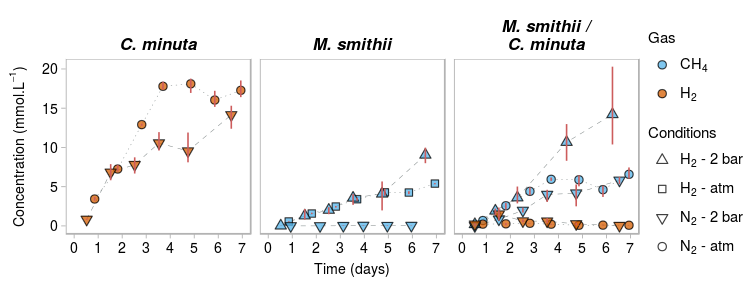

In [47]:
options(repr.plot.width=6.3, repr.plot.height=2.4)
mc.p

In [36]:
mb.p <- ggplot(data = ggc_long %>% subset(Concentration < 40 & Time < 7*24 & 
                                          str_detect(SampleBatch, pattern = 'B') 
                                         & !(gas == 'CH4' & microbe == 'B. thetaiotaomicron'))
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(aes(linetype = pressure), fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            #stat_summary(aes(shape=Batch),fun.y = "mean", size = 2, geom = "point", color = 'azure4', fill = 'white') +
            stat_summary(aes(shape=condition, fill = gas),fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +

            
            ylim(c(0,5)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,7*24)) +
            
            scale_shape_manual(values = c(25, 22)) +
            scale_fill_manual(name = 'Gas', values = c("#56B4E9", "#D55E00")) + 
            scale_linetype_manual(values = c("dashed", "dotted", "twodash"), guide = FALSE) +

            facet_grid(. ~microbe) +

            theme_light() + ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 

            theme(legend.position = 'none'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold.italic", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 #, legend.key.size = unit(0.8, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 
            

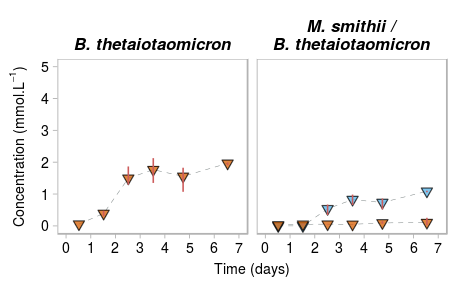

In [37]:
options(repr.plot.width=3.8, repr.plot.height=2.4)
mb.p

# SCFA

In [ ]:
scfa <- read.table('../SCFA_wt.txt')